# Modeling

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import random
random.seed(222)

In [2]:
X_train_l = pd.read_csv('./data/l_Xtrain.csv', index_col='Unnamed: 0')
X_test_l = pd.read_csv('./data/l_Xtest.csv', index_col='Unnamed: 0')

y_train_l = pd.read_csv('./data/l_ytrain.csv', index_col='Unnamed: 0')
y_test_l = pd.read_csv('./data/l_ytest.csv', index_col='Unnamed: 0')

X_train_r = pd.read_csv('./data/X_train_r.csv', index_col='Unnamed: 0')
X_test_r = pd.read_csv('./data/X_test_r.csv', index_col='Unnamed: 0')


y_train_r = pd.read_csv('./data/y_train_r.csv', index_col='Unnamed: 0')
y_test_r = pd.read_csv('./data/y_test_r.csv', index_col='Unnamed: 0')

In [3]:
y_train_l = y_train_l['type']
y_test_l = y_test_l['type']

In [ ]:
X_train_l.columns

In [ ]:
X_train_l.drop(columns = ['id'], inplace = True)
X_test_l.drop(columns = ['id'], inplace = True)
X_train_l.columns

In [5]:
r_X_train =  X_train_r['lem_comments']
r_X_test = X_test_r['lem_comments']

r_y_train = y_train_r['type']
r_y_test = y_test_r['type']

# Listings Classification Modeling

## Logistic Regression

In [6]:
X_train_l.columns

Index(['id', 'host_total_listings_count', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'calculated_host_listings_count',
       ...
       'bathrooms_text_3.5 baths', 'bathrooms_text_4 baths',
       'bathrooms_text_4 shared baths', 'bathrooms_text_4.5 baths',
       'bathrooms_text_5 baths', 'bathrooms_text_5 shared baths',
       'bathrooms_text_6.5 baths', 'bathrooms_text_9.5 baths',
       'bathrooms_text_Half-bath', 'instant_bookable_t'],
      dtype='object', length=146)

In [7]:
logreg = LogisticRegression(max_iter = 10000000)

In [8]:
logreg.fit(X_train_l, y_train_l)

LogisticRegression(max_iter=10000000)

In [9]:
print(f' Train accuracy: {logreg.score(X_train_l, y_train_l)}, Test accuracy: {logreg.score(X_test_l, y_test_l)}')

 Train accuracy: 0.5058448459086079, Test accuracy: 0.482484076433121


In [10]:
y_pred_logreg = logreg.predict(X_test_l)

In [11]:
tn_lr, fp_lr, fn_lr, tp_lr = confusion_matrix(y_test_l, y_pred_logreg).ravel()

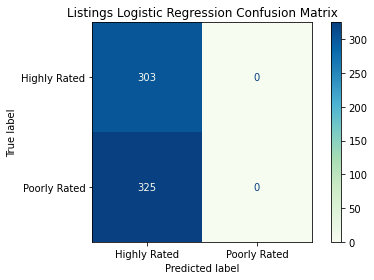

In [12]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_l, y_pred_logreg),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Listings Logistic Regression Confusion Matrix')
plt.tight_layout();

In [13]:
#Sensitivity 
print(f' Sensitivity: {tp_lr / (tp_lr+fn_lr)}')
#Specificity
print(f' Specificity: {tn_lr / (tn_lr+fp_lr)}')
#Precision 
print(f' Precision: {tp_lr/(tp_lr+fp_lr)}')

 Sensitivity: 0.0
 Specificity: 1.0
 Precision: nan


/var/folders/r1/szl7szs91f5bkjddv3cxyk8r0000gn/T/ipykernel_20638/1807635083.py:6: RuntimeWarning: invalid value encountered in long_scalars
  print(f' Precision: {tp_lr/(tp_lr+fp_lr)}')


## K Neighbors Classifier

In [14]:
pipe_cvec_knn = Pipeline([
    ('ss', StandardScaler(with_mean = True)),
    ('knn', KNeighborsClassifier())
])

pipe_cvec_knn_params = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['minkowski', 'euclidean', 'manhattan']
    
}

gs_cvec_knn = GridSearchCV(pipe_cvec_knn, pipe_cvec_knn_params, n_jobs = -1)
gs_cvec_knn.fit(X_train_l, y_train_l)

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['minkowski', 'euclidean', 'manhattan'],
                         'knn__n_neighbors': [3, 5, 7],
                         'knn__weights': ['uniform', 'distance']})

In [15]:
print(f' Train accuracy: {gs_cvec_knn.score(X_train_l, y_train_l)}, Test accuracy: {gs_cvec_knn.score(X_test_l, y_test_l)}')

 Train accuracy: 1.0, Test accuracy: 0.6687898089171974


In [16]:
gs_cvec_knn.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}

In [17]:
y_pred_knn = gs_cvec_knn.predict(X_test_l)

In [18]:
tn_knn, fp_knn, fn_knn, tp_knn = confusion_matrix(y_test_l, y_pred_knn).ravel()

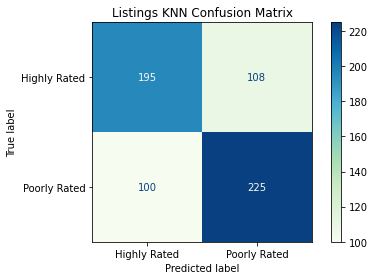

In [19]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_l, y_pred_knn),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Listings KNN Confusion Matrix')
plt.tight_layout();

In [20]:
#Sensitivity 
print(f' Sensitivity: {tp_knn / (tp_knn+fn_knn)}')
#Specificity
print(f' Specificity: {tn_knn / (tn_knn+fp_knn)}')
#Precision 
print(f' Precision: {tp_knn/(tp_knn+fp_knn)}')

 Sensitivity: 0.6923076923076923
 Specificity: 0.6435643564356436
 Precision: 0.6756756756756757


## Decision Tree Classifier

In [21]:
pipe_cvec_dt = Pipeline([
    ('dt', DecisionTreeClassifier(random_state = 222))
])

pipe_cvec_dt_params = {
    'dt__max_depth': [3, 5, 8],
    'dt__min_samples_leaf': [1, 2, 5]
    
}

gs_cvec_dt = GridSearchCV(pipe_cvec_dt, pipe_cvec_dt_params, n_jobs = -1)
gs_cvec_dt.fit(X_train_l, y_train_l)


GridSearchCV(estimator=Pipeline(steps=[('dt',
                                        DecisionTreeClassifier(random_state=222))]),
             n_jobs=-1,
             param_grid={'dt__max_depth': [3, 5, 8],
                         'dt__min_samples_leaf': [1, 2, 5]})

In [22]:
print(f' Train accuracy: {gs_cvec_dt.score(X_train_l, y_train_l)}, Test accuracy: {gs_cvec_dt.score(X_test_l, y_test_l)}')

 Train accuracy: 0.7906482465462275, Test accuracy: 0.6496815286624203


In [23]:
gs_cvec_dt.best_params_

{'dt__max_depth': 8, 'dt__min_samples_leaf': 5}

In [24]:
y_pred_dt = gs_cvec_dt.predict(X_test_l)

In [25]:
tn_dt, fp_dt, fn_dt, tp_dt = confusion_matrix(y_test_l, y_pred_dt).ravel()

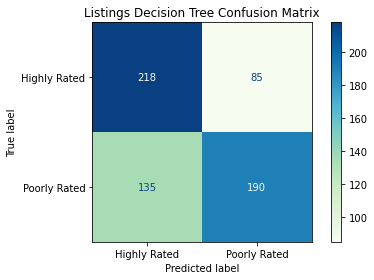

In [26]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_l, y_pred_dt),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Listings Decision Tree Confusion Matrix')
plt.tight_layout();

In [27]:
#Sensitivity 
print(f' Sensitivity: {tp_dt / (tp_dt+fn_dt)}')
#Specificity
print(f' Specificity: {tn_dt / (tn_dt+fp_dt)}')
#Precision 
print(f' Precision: {tp_dt/(tp_dt+fp_dt)}')

 Sensitivity: 0.5846153846153846
 Specificity: 0.7194719471947195
 Precision: 0.6909090909090909


## Random Forests Classifier

In [28]:
pipe_cvec_rf = Pipeline([
    ('rf', RandomForestClassifier(random_state =222))
])

pipe_cvec_rf_params = {
    'rf__n_estimators': [100, 125, 150],
    'rf__max_depth': [3, 5, 8],
    'rf__min_samples_leaf': [1, 2, 5]
    
}

gs_cvec_rf = GridSearchCV(pipe_cvec_rf, pipe_cvec_rf_params, n_jobs = -1)
gs_cvec_rf.fit(X_train_l, y_train_l)

GridSearchCV(estimator=Pipeline(steps=[('rf',
                                        RandomForestClassifier(random_state=222))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [3, 5, 8],
                         'rf__min_samples_leaf': [1, 2, 5],
                         'rf__n_estimators': [100, 125, 150]})

In [29]:
print(f' Train accuracy: {gs_cvec_rf.score(X_train_l, y_train_l)}, Test accuracy: {gs_cvec_rf.score(X_test_l, y_test_l)}')

 Train accuracy: 0.78586609989373, Test accuracy: 0.6990445859872612


In [30]:
gs_cvec_rf.best_params_

{'rf__max_depth': 8, 'rf__min_samples_leaf': 2, 'rf__n_estimators': 100}

In [31]:
y_pred_rf = gs_cvec_rf.predict(X_test_l)

In [32]:
tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix(y_test_l, y_pred_rf).ravel()

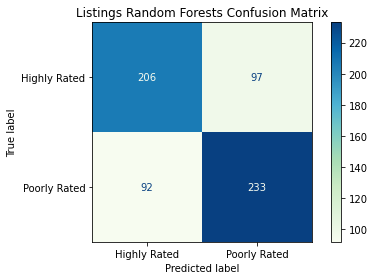

In [33]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_l, y_pred_rf),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Listings Random Forests Confusion Matrix')
plt.tight_layout();

In [34]:
#Sensitivity 
print(f' Sensitivity: {tp_rf / (tp_rf+fn_rf)}')
#Specificity
print(f' Specificity: {tn_rf / (tn_rf+fp_rf)}')
#Precision 
print(f' Precision: {tp_rf/(tp_rf+fp_rf)}')

 Sensitivity: 0.7169230769230769
 Specificity: 0.6798679867986799
 Precision: 0.706060606060606


## AdaBoost Classifier

In [35]:
pipe_cvec_ada = Pipeline([
    ('ada', AdaBoostClassifier(random_state =222))
])

pipe_cvec_ada_params = {
    'ada__n_estimators': [100, 125, 150],
    'ada__learning_rate': [1.0, 1.5]
    
}

gs_cvec_ada = GridSearchCV(pipe_cvec_ada, pipe_cvec_ada_params, n_jobs = -1)
gs_cvec_ada.fit(X_train_l, y_train_l)

GridSearchCV(estimator=Pipeline(steps=[('ada',
                                        AdaBoostClassifier(random_state=222))]),
             n_jobs=-1,
             param_grid={'ada__learning_rate': [1.0, 1.5],
                         'ada__n_estimators': [100, 125, 150]})

In [36]:
print(f' Train accuracy: {gs_cvec_ada.score(X_train_l, y_train_l)}, Test accuracy: {gs_cvec_ada.score(X_test_l, y_test_l)}')

 Train accuracy: 0.7747077577045696, Test accuracy: 0.7006369426751592


In [37]:
gs_cvec_ada.best_params_

{'ada__learning_rate': 1.5, 'ada__n_estimators': 150}

In [38]:
y_pred_ada = gs_cvec_ada.predict(X_test_l)

In [39]:
tn_ada, fp_ada, fn_ada, tp_ada = confusion_matrix(y_test_l, y_pred_ada).ravel()

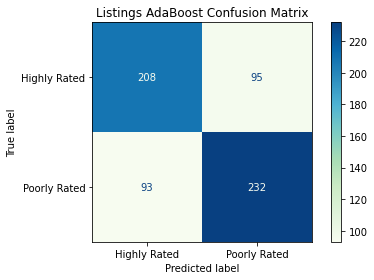

In [40]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_l, y_pred_ada),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Listings AdaBoost Confusion Matrix')
plt.tight_layout();

In [41]:
#Sensitivity 
print(f' Sensitivity: {tp_ada / (tp_ada+fn_ada)}')
#Specificity
print(f' Specificity: {tn_ada / (tn_ada+fp_ada)}')
#Precision 
print(f' Precision: {tp_ada/(tp_ada+fp_ada)}')

 Sensitivity: 0.7138461538461538
 Specificity: 0.6864686468646864
 Precision: 0.709480122324159


## GradientBoost Classifier

In [42]:
pipe_cvec_g = Pipeline([
    ('g_boost', GradientBoostingClassifier(random_state = 222))
])

pipe_cvec_g_params = {
    'g_boost__n_estimators': [100, 125, 150],
    'g_boost__learning_rate': [0.8, 1.0, 1.5],
    'g_boost__min_samples_split': [2]
    
}

gs_cvec_g = GridSearchCV(pipe_cvec_g, pipe_cvec_g_params, n_jobs = -1)
gs_cvec_g.fit(X_train_l, y_train_l)

GridSearchCV(estimator=Pipeline(steps=[('g_boost',
                                        GradientBoostingClassifier(random_state=222))]),
             n_jobs=-1,
             param_grid={'g_boost__learning_rate': [0.8, 1.0, 1.5],
                         'g_boost__min_samples_split': [2],
                         'g_boost__n_estimators': [100, 125, 150]})

In [43]:
print(f' Train accuracy: {gs_cvec_g.score(X_train_l, y_train_l)}, Test accuracy: {gs_cvec_g.score(X_test_l, y_test_l)}')

 Train accuracy: 0.9500531349628055, Test accuracy: 0.697452229299363


In [44]:
gs_cvec_g.best_params_

{'g_boost__learning_rate': 0.8,
 'g_boost__min_samples_split': 2,
 'g_boost__n_estimators': 100}

In [45]:
y_pred_g = gs_cvec_g.predict(X_test_l)

In [46]:
tn_g, fp_g, fn_g, tp_g = confusion_matrix(y_test_l, y_pred_g).ravel()

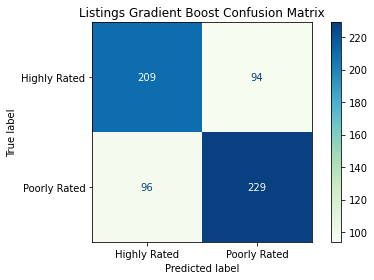

In [47]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_l, y_pred_g),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Listings Gradient Boost Confusion Matrix')
plt.tight_layout();

In [48]:
#Sensitivity 
print(f' Sensitivity: {tp_g / (tp_g+fn_g)}')
#Specificity
print(f' Specificity: {tn_g / (tn_g+fp_g)}')
#Precision 
print(f' Precision: {tp_g/(tp_g+fp_g)}')

 Sensitivity: 0.7046153846153846
 Specificity: 0.6897689768976898
 Precision: 0.7089783281733746


## Bagging Classifier

In [49]:
pipe_cvec_bag = Pipeline([
    ('bag', BaggingClassifier(random_state = 222))
])

pipe_cvec_bag_params = {
    'bag__n_estimators': [50, 100, 150],
    'bag__max_samples': [0.65, 0.75, 0.85, 1.0],
    'bag__max_features': [0.65, 0.75, 0.85, 1.0]
    
}

gs_cvec_bag = GridSearchCV(pipe_cvec_bag, pipe_cvec_bag_params, n_jobs = -1)
gs_cvec_bag.fit(X_train_l, y_train_l)

GridSearchCV(estimator=Pipeline(steps=[('bag',
                                        BaggingClassifier(random_state=222))]),
             n_jobs=-1,
             param_grid={'bag__max_features': [0.65, 0.75, 0.85, 1.0],
                         'bag__max_samples': [0.65, 0.75, 0.85, 1.0],
                         'bag__n_estimators': [50, 100, 150]})

In [50]:
print(f' Train accuracy: {gs_cvec_bag.score(X_train_l, y_train_l)}, Test accuracy: {gs_cvec_bag.score(X_test_l, y_test_l)}')

 Train accuracy: 0.9994686503719448, Test accuracy: 0.7117834394904459


In [51]:
gs_cvec_bag.best_params_

{'bag__max_features': 0.75, 'bag__max_samples': 0.75, 'bag__n_estimators': 100}

In [52]:
y_pred_bag = gs_cvec_bag.predict(X_test_l)

In [53]:
tn_bag, fp_bag, fn_bag, tp_bag = confusion_matrix(y_test_l, y_pred_bag).ravel()

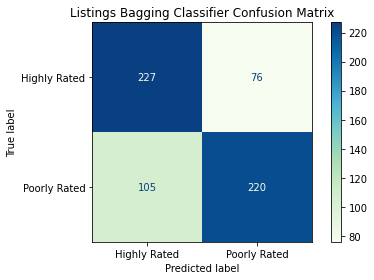

In [54]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_l, y_pred_bag),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Listings Bagging Classifier Confusion Matrix')
plt.tight_layout();

In [55]:
#Sensitivity 
print(f' Sensitivity: {tp_bag / (tp_bag+fn_bag)}')
#Specificity
print(f' Specificity: {tn_bag / (tn_bag+fp_bag)}')
#Precision 
print(f' Precision: {tp_bag/(tp_bag+fp_bag)}')

 Sensitivity: 0.676923076923077
 Specificity: 0.7491749174917491
 Precision: 0.7432432432432432


# Reviews Classification Modeling

## Logistic Regression

In [56]:
rpipe_cvec_logreg = Pipeline([
    ('cvec', CountVectorizer(token_pattern = '[a-zA-Z0-9]+')),
    ('logreg', LogisticRegression(random_state = 222, max_iter=1000))
])

rpipe_cvec_logreg_params = {
    'cvec__stop_words': ['english', None],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__max_df': [0.9, 1.0], 
    'logreg__solver': ['lbfgs', 'liblinear']
}

rgs_cvec_logreg = GridSearchCV(rpipe_cvec_logreg, rpipe_cvec_logreg_params, n_jobs = -1)
rgs_cvec_logreg.fit(r_X_train, r_y_train)

/Users/myacarrizosa/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(token_pattern='[a-zA-Z0-9]+')),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=222))]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.9, 1.0],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english', None],
                         'logreg__solver': ['lbfgs', 'liblinear']})

In [57]:
print(f' Train accuracy: {rgs_cvec_logreg.score(r_X_train, r_y_train)}, Test accuracy: {rgs_cvec_logreg.score(r_X_test, r_y_test)}')

 Train accuracy: 0.8643874178940067, Test accuracy: 0.7713866111859013


In [58]:
rgs_cvec_logreg.best_params_

{'cvec__max_df': 0.9,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': None,
 'logreg__solver': 'lbfgs'}

In [59]:
ry_pred_logreg = rgs_cvec_logreg.predict(r_X_test)

In [60]:
rtn_lr, rfp_lr, rfn_lr, rtp_lr = confusion_matrix(r_y_test, ry_pred_logreg).ravel()

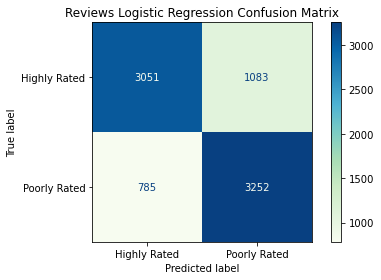

In [61]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(r_y_test, ry_pred_logreg),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Reviews Logistic Regression Confusion Matrix')
plt.tight_layout();

In [62]:
#Sensitivity 
print(f' Sensitivity: {rtp_lr / (rtp_lr+rfn_lr)}')
#Specificity
print(f' Specificity: {rtn_lr / (rtn_lr+rfp_lr)}')
#Precision 
print(f' Precision: {rtp_lr/(rtp_lr+rfp_lr)}')

 Sensitivity: 0.805548674758484
 Specificity: 0.7380261248185777
 Precision: 0.7501730103806228


## K Neighbors Classifier

In [63]:
rpipe_cvec_knn = Pipeline([
    ('cvec', CountVectorizer(token_pattern = '[a-zA-Z0-9]+')),
    ('ss', StandardScaler(with_mean = False)),
    ('knn', KNeighborsClassifier())
])

rpipe_cvec_knn_params = {
    'cvec__stop_words': ['english', None],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__max_df': [0.9, 1.0],
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['minkowski', 'euclidean', 'manhattan']
    
}

rgs_cvec_knn = GridSearchCV(rpipe_cvec_knn, rpipe_cvec_knn_params, n_jobs = -1)
rgs_cvec_knn.fit(r_X_train, r_y_train)

KeyboardInterrupt: 

In [ ]:
print(f' Train accuracy: {rgs_cvec_knn.score(r_X_train, r_y_train)}, Test accuracy: {rgs_cvec_knn.score(r_X_test, r_y_test)}')

In [ ]:
rgs_cvec_knn.best_params_

In [ ]:
ry_pred_knn = rgs_cvec_knn.predict(r_X_test)

In [ ]:
rtn_knn, rfp_knn, rfn_knn, rtp_knn = confusion_matrix(r_y_test, ry_pred_knn).ravel()

In [ ]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(r_y_test, ry_pred_knn),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Reviews KNN Confusion Matrix')
plt.tight_layout();

In [ ]:
#Sensitivity 
print(f' Sensitivity: {rtp_knn / (rtp_knn+rfn_knn)}')
#Specificity
print(f' Specificity: {rtn_knn / (rtn_knn+rfp_knn)}')
#Precision 
print(f' Precision: {rtp_knn/(rtp_knn+rfp_knn)}')

## Decision Tree

In [ ]:
rpipe_cvec_dt = Pipeline([
    ('cvec', CountVectorizer(token_pattern = '[a-zA-Z0-9]+')),
    ('dt', DecisionTreeClassifier(random_state = 222))
])

rpipe_cvec_dt_params = {
    'cvec__stop_words': ['english', None],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__max_df': [0.9, 1.0],
    'dt__max_depth': [3, 5, 8],
    'dt__min_samples_leaf': [1, 2, 5]
    
}

rgs_cvec_dt = GridSearchCV(rpipe_cvec_dt, rpipe_cvec_dt_params, n_jobs = -1)
rgs_cvec_dt.fit(r_X_train, r_y_train)


In [ ]:
print(f' Train accuracy: {rgs_cvec_dt.score(r_X_train, r_y_train)}, Test accuracy: {rgs_cvec_dt.score(r_X_test, r_y_test)}')

In [ ]:
rgs_cvec_dt.best_params_

In [ ]:
ry_pred_dt = rgs_cvec_dt.predict(r_X_test)

In [ ]:
rtn_dt, rfp_dt, rfn_dt, rtp_dt = confusion_matrix(r_y_test, ry_pred_dt).ravel()

In [ ]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(r_y_test, ry_pred_dt),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Reviews Decision Tree Confusion Matrix')
plt.tight_layout();

In [ ]:
#Sensitivity 
print(f' Sensitivity: {rtp_dt / (rtp_dt+rfn_dt)}')
#Specificity
print(f' Specificity: {rtn_dt / (rtn_dt+rfp_dt)}')
#Precision 
print(f' Precision: {rtp_dt/(rtp_dt+rfp_dt)}')

## Random Forest

In [ ]:
rpipe_cvec_rf = Pipeline([
    ('cvec', CountVectorizer(token_pattern = '[a-zA-Z0-9]+')),
    ('rf', RandomForestClassifier(random_state =222))
])

rpipe_cvec_rf_params = {
    'cvec__stop_words': ['english', None],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__max_df': [0.9, 1.0],
    'rf__n_estimators': [100, 125, 150],
    'rf__max_depth': [3, 5, 8],
    'rf__min_samples_leaf': [1, 2, 5]
    
}

rgs_cvec_rf = GridSearchCV(rpipe_cvec_rf, rpipe_cvec_rf_params, n_jobs = -1)
rgs_cvec_rf.fit(r_X_train, r_y_train)

In [ ]:
print(f' Train accuracy: {rgs_cvec_rf.score(r_X_train, r_y_train)}, Test accuracy: {rgs_cvec_rf.score(r_X_test, r_y_test)}')

In [ ]:
rgs_cvec_rf.best_params_

In [ ]:
ry_pred_rf = rgs_cvec_rf.predict(r_X_test)

In [ ]:
rtn_rf, rfp_rf, rfn_rf, rtp_rf = confusion_matrix(r_y_test, ry_pred_rf).ravel()

In [ ]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(r_y_test, ry_pred_rf),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Reviews Random Forests Confusion Matrix')
plt.tight_layout();

In [ ]:
#Sensitivity 
print(f' Sensitivity: {rtp_rf / (rtp_rf+rfn_rf)}')
#Specificity
print(f' Specificity: {rtn_rf / (rtn_rf+rfp_rf)}')
#Precision 
print(f' Precision: {rtp_rf/(rtp_rf+rfp_rf)}')

## ADA Boost

In [ ]:
rpipe_cvec_ada = Pipeline([
    ('cvec', CountVectorizer(token_pattern = '[a-zA-Z0-9]+')),
    ('ada', AdaBoostClassifier(random_state =222))
])

rpipe_cvec_ada_params = {
    'cvec__stop_words': ['english', None],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__max_df': [0.9, 1.0],
    'ada__n_estimators': [100, 125, 150],
    'ada__learning_rate': [1.0, 1.5]
    
}

rgs_cvec_ada = GridSearchCV(rpipe_cvec_ada, rpipe_cvec_ada_params, n_jobs = -1)
rgs_cvec_ada.fit(r_X_train, r_y_train)

In [ ]:
print(f' Train accuracy: {rgs_cvec_ada.score(r_X_train, r_y_train)}, Test accuracy: {rgs_cvec_ada.score(r_X_test, r_y_test)}')

In [ ]:
rgs_cvec_ada.best_params_

In [ ]:
ry_pred_ada = rgs_cvec_ada.predict(r_X_test)

In [ ]:
rtn_ada, rfp_ada, rfn_ada, rtp_ada = confusion_matrix(r_y_test, ry_pred_ada).ravel()

In [ ]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(r_y_test, ry_pred_ada),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Reviews AdaBoost Confusion Matrix')
plt.tight_layout();

In [ ]:
#Sensitivity 
print(f' Sensitivity: {rtp_ada / (rtp_ada+rfn_ada)}')
#Specificity
print(f' Specificity: {rtn_ada / (rtn_ada+rfp_ada)}')
#Precision 
print(f' Precision: {rtp_ada/(rtp_ada+rfp_ada)}')

## Gradient Boost

In [ ]:
rpipe_cvec_g = Pipeline([
    ('cvec', CountVectorizer(token_pattern = '[a-zA-Z0-9]+')),
    ('g_boost', GradientBoostingClassifier(random_state = 222))
])

rpipe_cvec_g_params = {
    'cvec__stop_words': ['english', None],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__max_df': [0.9, 1.0],
    'g_boost__n_estimators': [100, 125, 150],
    'g_boost__learning_rate': [0.8, 1.0, 1.5],
    'g_boost__min_samples_split': [2]
    
}

rgs_cvec_g = GridSearchCV(rpipe_cvec_g, rpipe_cvec_g_params, n_jobs = -1)
rgs_cvec_g.fit(r_X_train, r_y_train)

In [ ]:
print(f' Train accuracy: {rgs_cvec_g.score(r_X_train, r_y_train)}, Test accuracy: {rgs_cvec_g.score(r_X_test, r_y_test)}')

In [ ]:
rgs_cvec_g.best_params_

In [ ]:
ry_pred_g = rgs_cvec_g.predict(r_X_test)

In [ ]:
rtn_g, rfp_g, rfn_g, rtp_g = confusion_matrix(r_y_test, ry_pred_g).ravel()

In [ ]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(r_y_test, ry_pred_g),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Reviews Gradient Boost Confusion Matrix')
plt.tight_layout();

In [ ]:
#Sensitivity 
print(f' Sensitivity: {rtp_g / (rtp_g+rfn_g)}')
#Specificity
print(f' Specificity: {rtn_g / (rtn_g+rfp_g)}')
#Precision 
print(f' Precision: {rtp_g/(rtp_g+rfp_g)}')

## Bagging Classifier

In [ ]:
rpipe_cvec_bag = Pipeline([
    ('cvec', CountVectorizer(token_pattern = '[a-zA-Z0-9]+')),
    ('bag', BaggingClassifier(random_state = 222))
])

rpipe_cvec_bag_params = {
    'cvec__stop_words': ['english', None],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__max_df': [0.9, 1.0],
    'bag__n_estimators': [50, 100, 150],
    'bag__max_samples': [0.65, 0.75, 0.85, 1.0],
    'bag__max_features': [0.65, 0.75, 0.85, 1.0]
    
}

rgs_cvec_bag = GridSearchCV(rpipe_cvec_bag, rpipe_cvec_bag_params, n_jobs = -1)
rgs_cvec_bag.fit(r_X_train, r_y_train)

In [ ]:
print(f' Train accuracy: {rgs_cvec_bag.score(r_X_train, r_y_train)}, Test accuracy: {rgs_cvec_bag.score(r_X_test, r_y_test)}')

In [ ]:
rgs_cvec_bag.best_params_

In [ ]:
ry_pred_bag = rgs_cvec_bag.predict(r_X_test)

In [ ]:
rtn_bag, rfp_bag, rfn_bag, rtp_bag = confusion_matrix(r_y_test, ry_pred_bag).ravel()

In [ ]:
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(r_y_test, ry_pred_bag),
                      display_labels=['Highly Rated', 'Poorly Rated']);
cmd.plot(cmap = 'GnBu')
plt.title('Reviews Bagging Classifier Confusion Matrix')
plt.tight_layout();

In [ ]:
#Sensitivity 
print(f' Sensitivity: {rtp_bag / (rtp_bag+rfn_bag)}')
#Specificity
print(f' Specificity: {rtn_bag / (rtn_bag+rfp_bag)}')
#Precision 
print(f' Precision: {rtp_bag/(rtp_bag+rfp_bag)}')